In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pwd

'/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/practice'

In [2]:
path_to_dates = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/shared/homeworks/python_ds_miniprojects/4/data'

In [3]:
data = []
dates = os.listdir(path_to_dates)
dates

['2020-12-05',
 '2020-12-08',
 '2020-12-09',
 '2020-12-04',
 '2020-12-06',
 '2020-12-03',
 '2020-12-07']

In [6]:
os.listdir('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05')

['Petr_Ivanov',
 'Petr_Smirnov',
 'Rostislav_Smirnov',
 'Kirill_Smirnov',
 'Alexey_Fedorov',
 'Alexey_Petrov']

In [10]:
os.listdir('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov')

['data.csv']

In [12]:
pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov/data.csv', index_col=0)

,product_id,quantity
0,27,4
1,89,1
2,33,2
3,8,3
4,16,1


In [4]:
# Parse folders and concat them all into one DataFrame

data = pd.DataFrame()

for d in dates:
    date = d
    names = os.listdir(path_to_dates + '/' + date)
    
    for n in names:
        name = n
        data_chunk = pd.read_csv(path_to_dates + '/' + date + '/' + name + '/data.csv', index_col=0)
        
        data_chunk['name'] = name
        data_chunk['date'] = date
        
        data = pd.concat([data, data_chunk], ignore_index=True)

In [109]:
data

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
156,18,4,Petr_Fedorov,2020-12-07
157,94,4,Petr_Fedorov,2020-12-07
158,95,2,Vasiliy_Ivanov,2020-12-07
159,83,3,Vasiliy_Ivanov,2020-12-07


In [5]:
# Get total quantity
data.quantity.sum()

480

In [6]:
# Find users with the most total purchases
data \
    .groupby('name', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .sort_values(by='quantity', ascending=False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


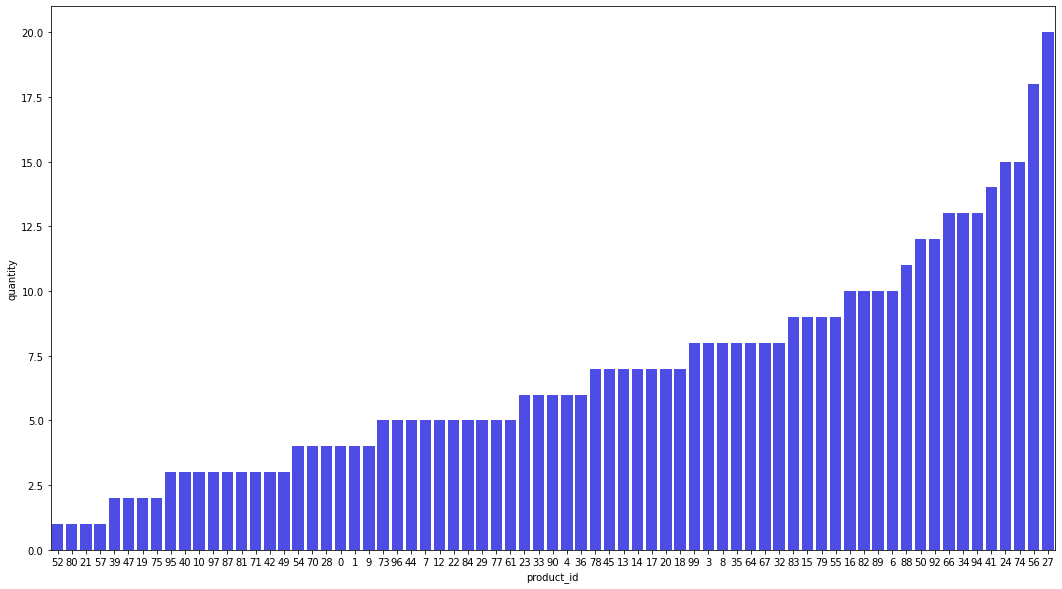

In [7]:
data_by_product = data.groupby('product_id', as_index=False).agg({'quantity': 'sum'})

plt.figure(figsize=(18, 10))
sns.barplot(data=data_by_product, x='product_id', y='quantity', 
            order=data_by_product.sort_values(by='quantity').product_id,
           color='blue', alpha=0.8)


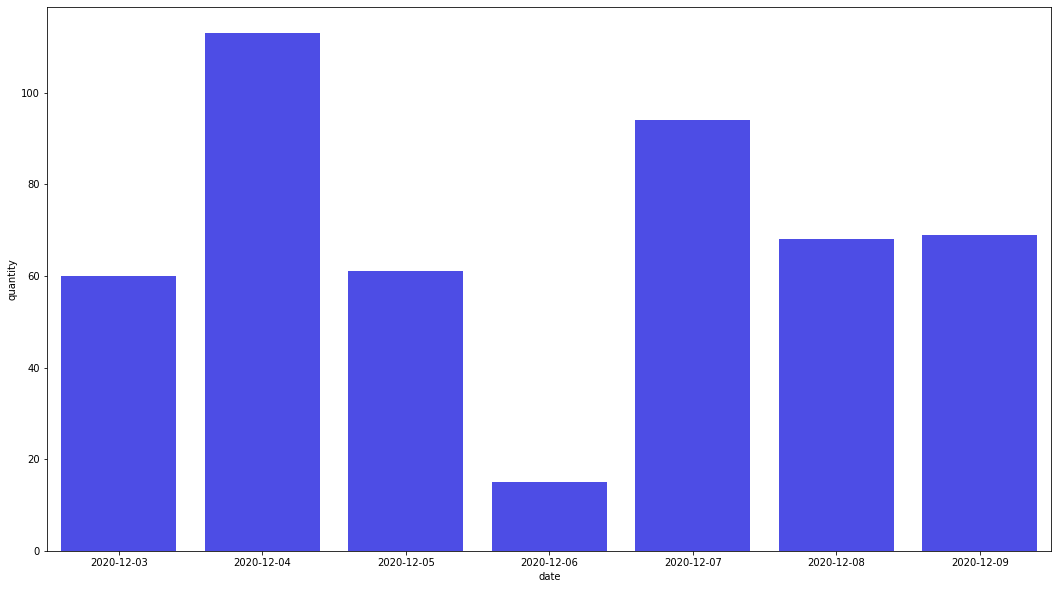

In [8]:
data_by_date = data.groupby('date', as_index=False).agg({'quantity': 'sum'})

plt.figure(figsize=(18, 10))
sns.barplot(data=data_by_date, x='date', y='quantity',
           color='blue', alpha=0.8)

In [11]:
data_norepeats = pd.DataFrame()

for d in dates:
    date = d
    names = os.listdir(path_to_dates + '/' + date)
    
    for n in names:
        name = n
        data_chunk = pd.read_csv(path_to_dates + '/' + date + '/' + name + '/data.csv', index_col=0)
        
        data_chunk['name'] = name
        data_chunk['date'] = date
        data_chunk = data_chunk.drop_duplicates(subset='product_id')
        
        data_norepeats = pd.concat([data_norepeats, data_chunk], ignore_index=True)

In [16]:
names = [i for i in data.name.unique()]
names

['Petr_Ivanov',
 'Petr_Smirnov',
 'Rostislav_Smirnov',
 'Kirill_Smirnov',
 'Alexey_Fedorov',
 'Alexey_Petrov',
 'Petr_Petrov',
 'Rostislav_Petrov',
 'Anton_Smirnov',
 'Alexey_Smirnov',
 'Anton_Petrov',
 'Anton_Ivanov',
 'Petr_Fedorov',
 'Vasiliy_Ivanov',
 'Kirill_Fedorov',
 'Rostislav_Ivanov',
 'Rostislav_Fedorov',
 'Vasiliy_Fedorov',
 'Vasiliy_Petrov',
 'Kirill_Petrov',
 'Alexey_Ivanov']

In [37]:
loyal_customers = pd.DataFrame()
repeat_purchases = pd.DataFrame()

for i in names: 
    print(i)
    cust_purchases = data_norepeats.query('name == "%s"' % i)
    repeat_purchases_chunk = cust_purchases.loc[cust_purchases.product_id.duplicated()]
    
    repeat_purchases = pd.concat([repeat_purchases, repeat_purchases_chunk], ignore_index=True)

Petr_Ivanov
Petr_Smirnov
Rostislav_Smirnov
Kirill_Smirnov
Alexey_Fedorov
Alexey_Petrov
Petr_Petrov
Rostislav_Petrov
Anton_Smirnov
Alexey_Smirnov
Anton_Petrov
Anton_Ivanov
Petr_Fedorov
Vasiliy_Ivanov
Kirill_Fedorov
Rostislav_Ivanov
Rostislav_Fedorov
Vasiliy_Fedorov
Vasiliy_Petrov
Kirill_Petrov
Alexey_Ivanov


In [38]:
repeat_purchases

,product_id,quantity,name,date
0,15,4,Anton_Ivanov,2020-12-07
1,94,4,Petr_Fedorov,2020-12-07
